# Medical Cost Personal Insurance Project

Health insurance is a type of insurance that covers medical expenses that arise due to an illness. These expenses could be related to hospitalisation costs, cost of medicines or doctor consultation fees. The main purpose of medical insurance is to receive the best medical care without any strain on your finances. Health insurance plans offer protection against high medical costs. It covers hospitalization expenses, day care procedures, domiciliary expenses, and ambulance charges, besides many others. Based on certain input features such as age , bmi,,no of dependents ,smoker ,region  medical insurance is calculated .
Columns  

•	age: age of primary beneficiary

•	sex: insurance contractor gender, female, male

•	bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9.

•	children: Number of children covered by health insurance / Number of dependents

•	smoker: Smoking

•	region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

•	charges: Individual medical costs billed by health insurance



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset4/main/medical_cost_insurance.csv")

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


We can see 7 columns are there in that sex,smoker,and region are categorical columns.by observing the charges column we can conclude that there is continous data so it regrassion problem 

 # Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We can see here no any null values in any column

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


We can see that there is lot of difference between max charges and thired quartor charges.same for bmi column also.

In [7]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

We can see that only two two value in sex column

In [8]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
df["region"].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

There are four value in region column

<AxesSubplot:xlabel='sex', ylabel='count'>

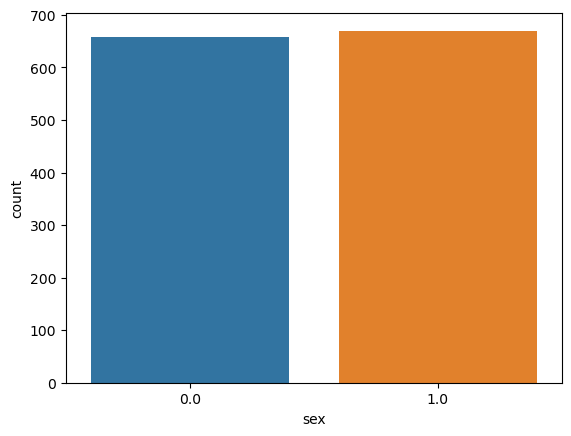

In [41]:
sns.countplot(df['sex'])

The Count of female and male is almost same

<AxesSubplot:xlabel='smoker', ylabel='count'>

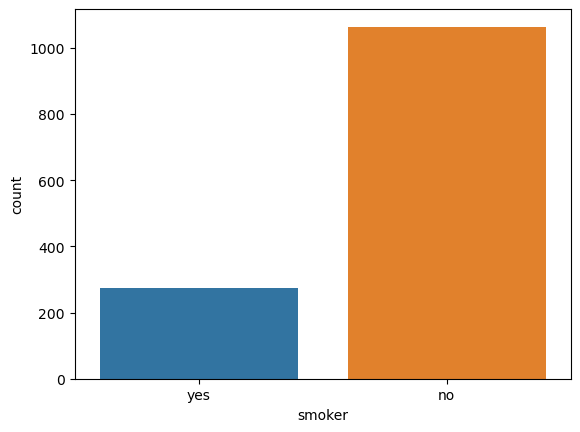

In [11]:
sns.countplot(df["smoker"])

The Count of smoker is less than the No smoker 

<AxesSubplot:xlabel='region', ylabel='count'>

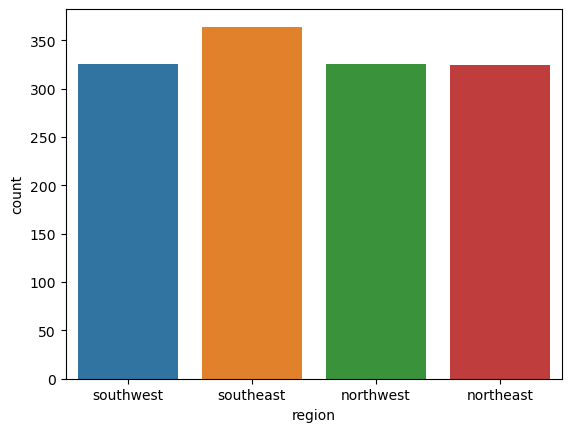

In [12]:
sns.countplot(df["region"])

In region the count of southeast is large than other. Others are having almost equal count

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


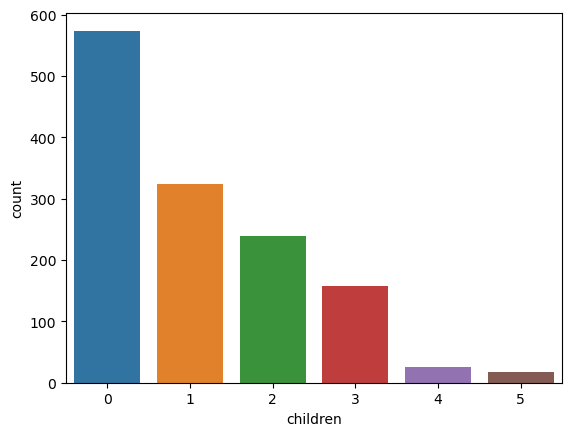

In [13]:
print(df["children"].value_counts())
sns.countplot(df['children'])
plt.show()


We observed that 0 childern is more high than other. There is increasing trend.

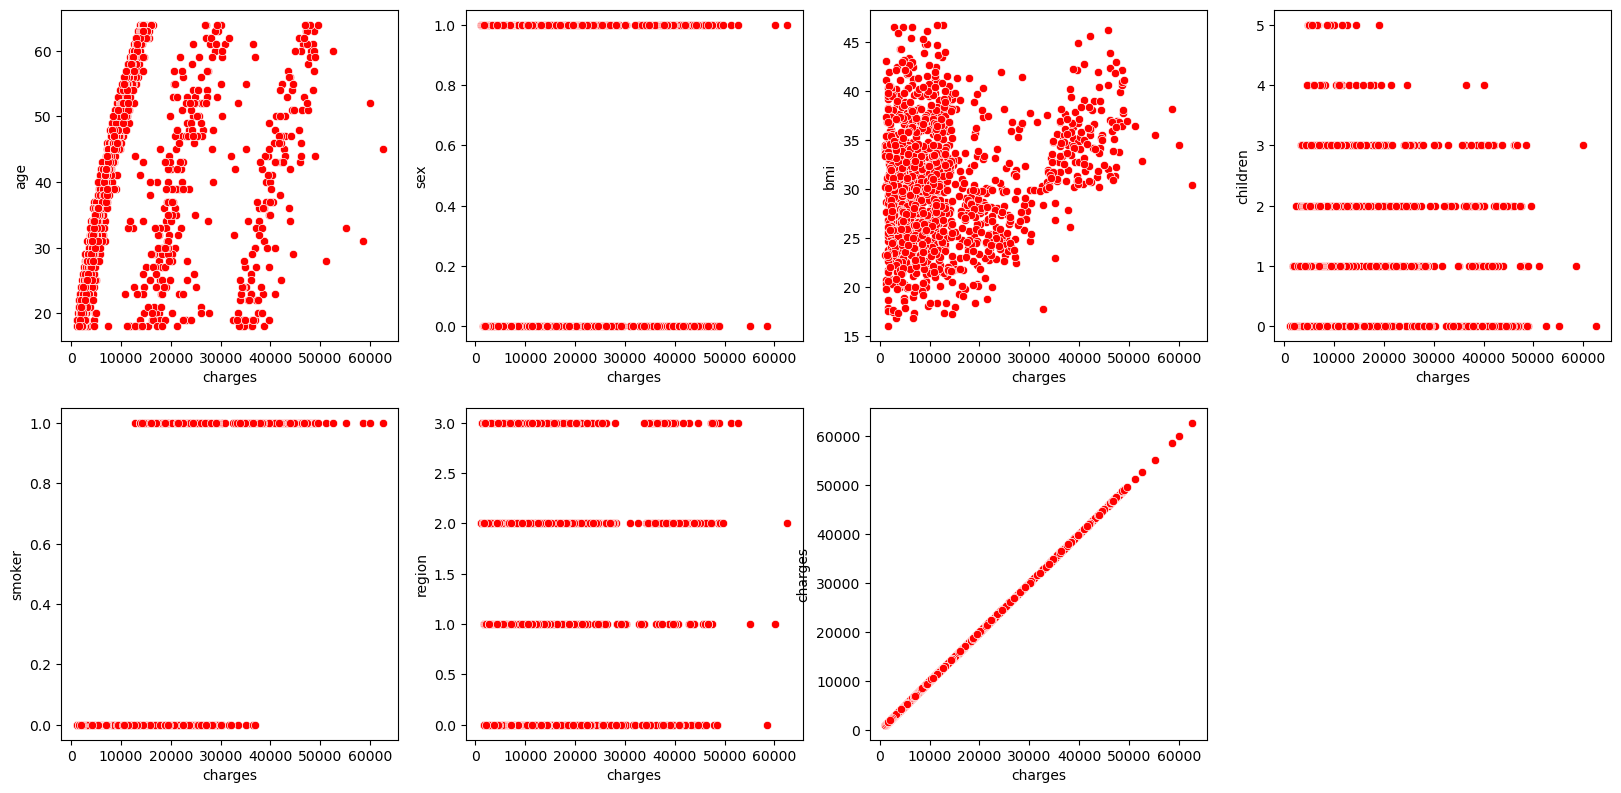

In [44]:
plt.figure(figsize=(20,25))
p=1
for i in df:
    if p<=17:
        plt.subplot(5,4,p)
        sns.scatterplot(x="charges",y=i,data=df,color='r')
        plt.xlabel("charges")
        plt.ylabel(i)
        
        p+=1
plt.show()        

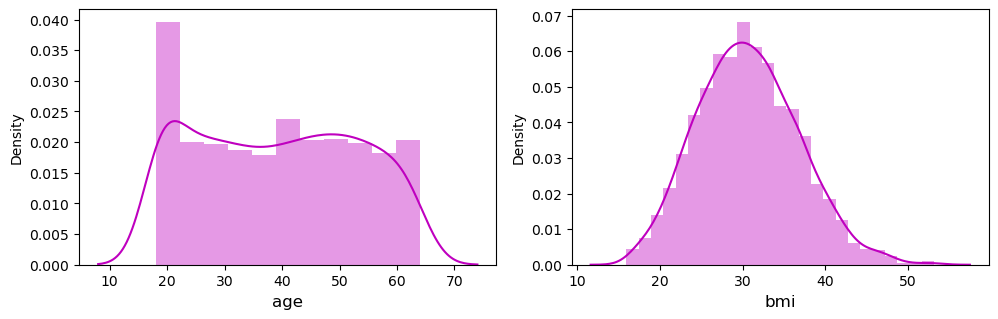

In [14]:
numerical_col =['age','bmi']
plt.figure(figsize=(10,6),facecolor="white")
plotnumer =1
for col in numerical_col:
    if plotnumer<=4:
        ax =plt.subplot(2,2,plotnumer)
        sns.distplot(df[col],color="m")
        plt.xlabel(col,fontsize =12)
        plt.yticks(rotation =0,fontsize =10)
    plotnumer+=1
plt.tight_layout()    

In above graph we seen that the bmi is having approximatly normal distribution.

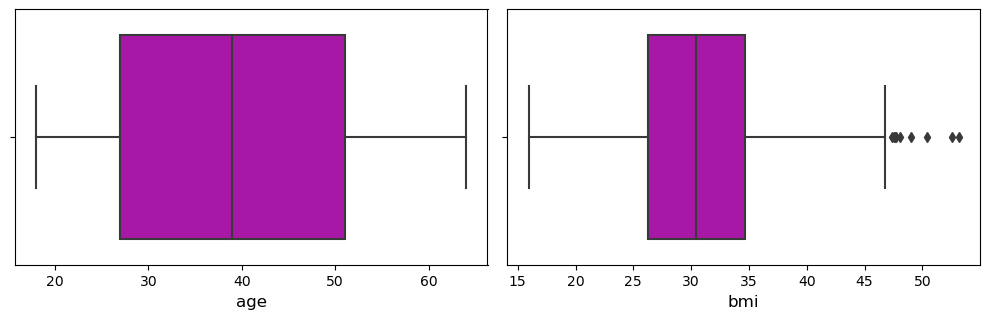

In [15]:
numerical_col =['age','bmi']
plt.figure(figsize=(10,6),facecolor="white")
plotnumer =1
for col in numerical_col:
    if plotnumer<=4:
        ax =plt.subplot(2,2,plotnumer)
        sns.boxplot(df[col],color="m")
        plt.xlabel(col,fontsize =12)
        plt.yticks(rotation =0,fontsize =10)
    plotnumer+=1
plt.tight_layout()    

BMI column data having the outliers we have to remove it.

In [16]:
q1 =df.quantile(0.25)

q3 =df.quantile(0.75)

iqr =q3 -q1

In [17]:
high_bmi =q3.bmi +(1.5 *iqr.bmi)
high_bmi

47.290000000000006

In [18]:
xyz =np.where(df["bmi"]>high_bmi)
xyz

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

In [19]:
df =df.drop(df.index[xyz])
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [20]:
df.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,male,30.970,3,no,northwest,10600.54830
1325,1334,18,female,31.920,0,no,northeast,2205.98080
1326,1335,18,female,36.850,0,no,southeast,1629.83350
1327,1336,21,female,25.800,0,no,southwest,2007.94500


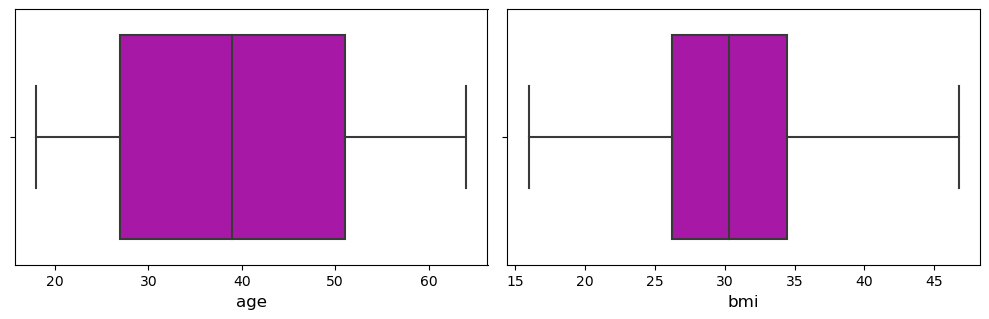

In [21]:
numerical_col =['age','bmi']
plt.figure(figsize=(10,6),facecolor="white")
plotnumer =1
for col in numerical_col:
    if plotnumer<=4:
        ax =plt.subplot(2,2,plotnumer)
        sns.boxplot(df[col],color="m")
        plt.xlabel(col,fontsize =12)
        plt.yticks(rotation =0,fontsize =10)
    plotnumer+=1
plt.tight_layout()

We have removed the all outliers

In [22]:
from sklearn.preprocessing import OrdinalEncoder
OE = OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i] =OE.fit_transform(df[i].values.reshape(-1,1))
df        

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3.0,16884.92400
1,18,1.0,33.770,1,0.0,2.0,1725.55230
2,28,1.0,33.000,3,0.0,2.0,4449.46200
3,33,1.0,22.705,0,0.0,1.0,21984.47061
4,32,1.0,28.880,0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0,10600.54830
1334,18,0.0,31.920,0,0.0,0.0,2205.98080
1335,18,0.0,36.850,0,0.0,2.0,1629.83350
1336,21,0.0,25.800,0,0.0,3.0,2007.94500


In [23]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000,1329.000000
mean,39.203913,0.504138,30.537348,1.096313,0.203913,1.513168,13212.333374
std,14.047835,0.500171,5.919946,1.207928,0.403057,1.106532,11997.236429
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4738.268200
50%,39.000000,1.000000,30.300000,1.000000,0.000000,2.000000,9361.326800
75%,51.000000,1.000000,34.485000,2.000000,0.000000,2.000000,16586.497710
max,64.000000,1.000000,46.750000,5.000000,1.000000,3.000000,62592.873090


In [24]:
corr = df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019143,0.114686,0.043041,-0.024505,0.002806,0.302022
sex,-0.019143,1.000000,0.039958,0.019281,0.079854,0.002963,0.063394
bmi,0.114686,0.039958,1.000000,0.017355,-0.002871,0.155847,0.193196
children,0.043041,0.019281,0.017355,1.000000,0.007577,0.017642,0.069739
smoker,-0.024505,0.079854,-0.002871,0.007577,1.000000,-0.005181,0.785912
region,0.002806,0.002963,0.155847,0.017642,-0.005181,1.000000,-0.010730
charges,0.302022,0.063394,0.193196,0.069739,0.785912,-0.010730,1.000000


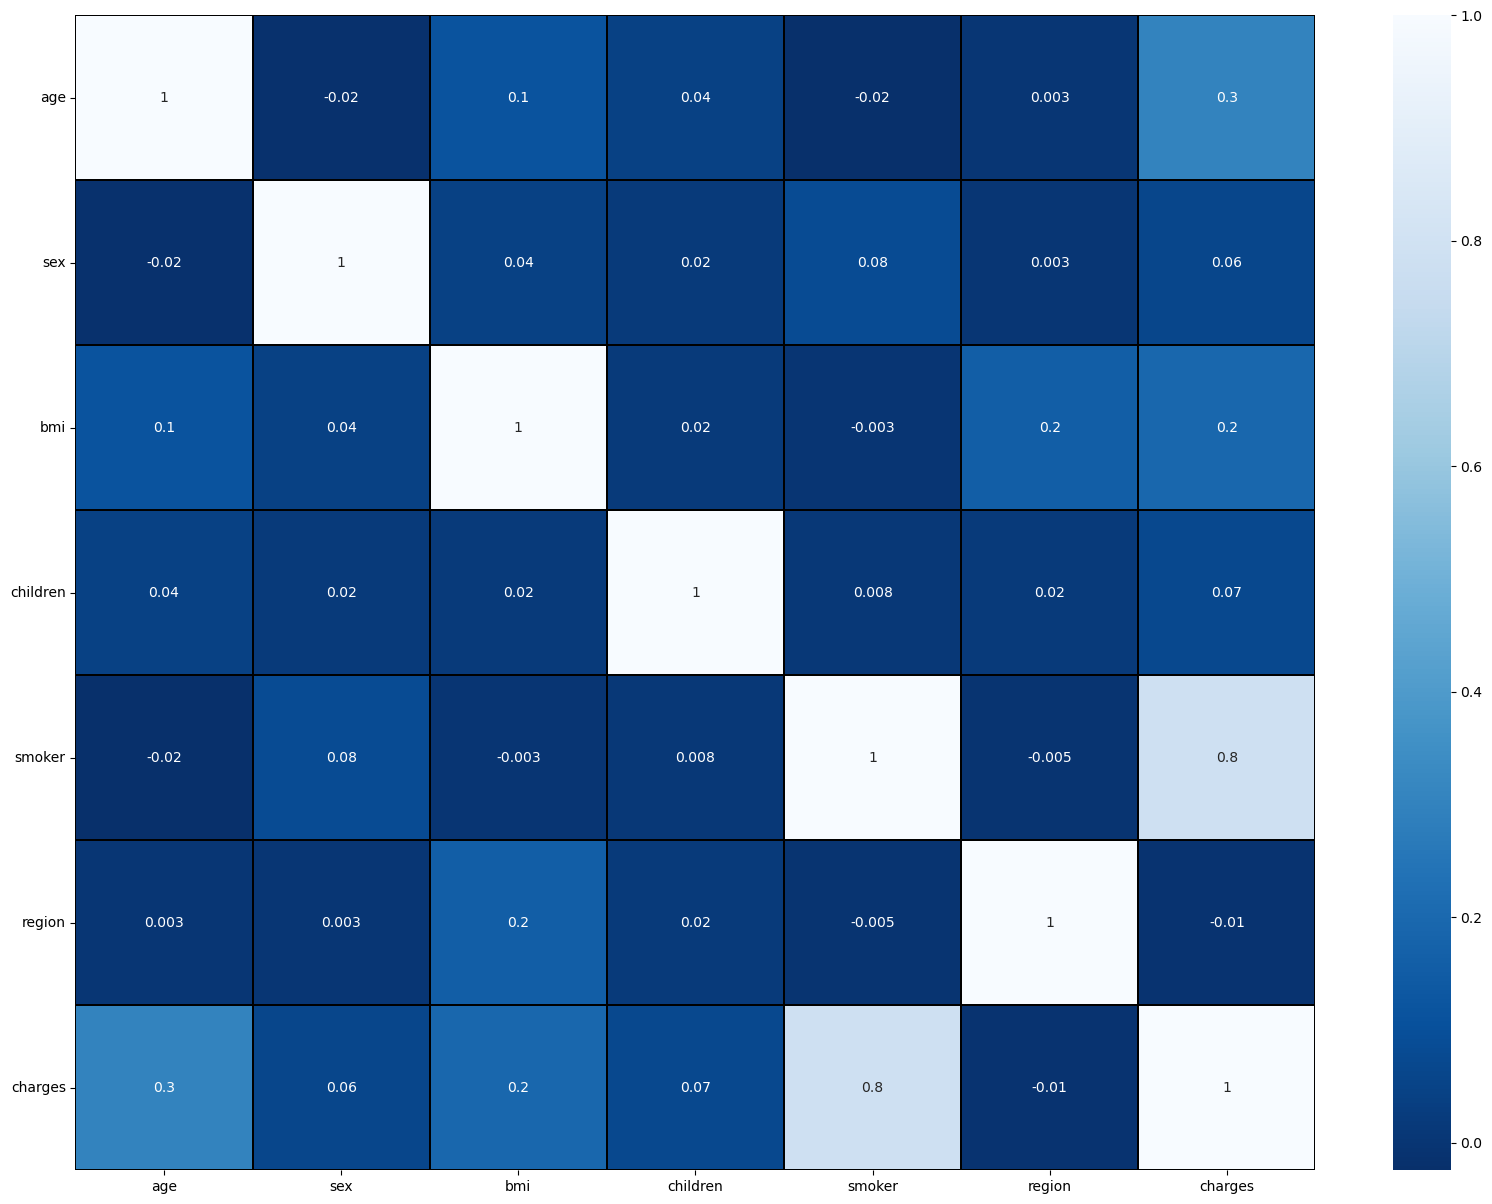

In [25]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),linewidths=0.1,fmt=".1g",linecolor="black",annot=True,cmap="Blues_r")
plt.yticks(rotation=0);
plt.show()

# Seprating the The label and features

In [26]:
x =df.drop("charges",axis =1)
y = df['charges']

# Features scalling using standard scalarization.


In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x),columns=x.columns)


In [28]:
x

,age,sex,bmi,children,smoker,region
0,-1.438764,-1.008311,-0.445670,-0.907940,1.975869,1.344193
1,-1.509976,0.991757,0.546267,-0.079764,-0.506106,0.440128
2,-0.797855,0.991757,0.416149,1.576587,-0.506106,0.440128
3,-0.441794,0.991757,-1.323542,-0.907940,-0.506106,-0.463937
4,-0.513006,0.991757,-0.280065,-0.907940,-0.506106,-0.463937
...,...,...,...,...,...,...
1324,0.768813,0.991757,0.073111,1.576587,-0.506106,-0.463937
1325,-1.509976,-1.008311,0.233646,-0.907940,-0.506106,-1.368002
1326,-1.509976,-1.008311,1.066737,-0.907940,-0.506106,0.440128
1327,-1.296340,-1.008311,-0.800536,-0.907940,-0.506106,1.344193


In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] =[variance_inflation_factor(x.values,i)
                   for i in range (len(x.columns))]
vif["Feature"] =x.columns

vif


,VIF values,Feature
0,1.016476,age
1,1.008922,sex
2,1.040761,bmi
3,1.002702,children
4,1.007041,smoker
5,1.025432,region


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30,random_state=200)
LR = LinearRegression()
LR.fit(x_train,y_train)

LinearRegression()

In [31]:
from sklearn.metrics import r2_score


In [32]:
pred =LR.predict(x)

In [33]:
r2_score(y,pred)

0.7491690837195466

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [35]:
RR =RandomForestRegressor()
RR.fit(x_train,y_train)
pred =RR.predict(x)
r2_score(y,pred)

0.9407707014714526

In [36]:
DR =DecisionTreeRegressor()
DR.fit(x_train,y_train)
pred =DR.predict(x)
r2_score(y,pred)

0.92309235795819

In [37]:
knn=KNN()
knn.fit(x_train,y_train)
pred =knn.predict(x)
r2_score(y,pred)

0.8551678745679285

In [38]:
lesso =Lasso()
lesso.fit(x_train,y_train)
pred =lesso.predict(x)
r2_score(y,pred)

0.7491754275049409

In [39]:
RG =Ridge()
RG.fit(x_train,y_train)
pred =RG.predict(x)
r2_score(y,pred)

0.7491961656856778

We seen that the Random forest regressor is having high accuracy as compared to other models